In [ ]:
#Required for accessing openml datasets from Lale
!pip install 'liac-arff>=2.4.0'

In [1]:
import lale.datasets.openml
import pandas as pd
(train_X, train_y), (test_X, test_y) = lale.datasets.openml.fetch(
    'credit-g', 'classification', preprocess=True)

In [2]:
import numpy as np
np.bincount(train_y)

array([204, 466])

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem as Nys
from lale.lib.lale import NoOp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble.forest import RandomForestClassifier
from xgboost import XGBClassifier
from lale.lib.lale import Hyperopt
from lale.lib.imblearn import SMOTE
from sklearn.metrics import accuracy_score
import lale
lale.wrap_imported_operators()

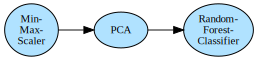

In [4]:
pipeline_without_correction =  MinMaxScaler() >> PCA() >> RandomForestClassifier()
pipeline_without_correction.visualize()

In [5]:
optimizer = Hyperopt(estimator=pipeline_without_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:26<00:00,  2.66s/trial, best loss: -0.7560057976351898]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.756006,0.353441,0.591035,ok
p2,2,-0.668102,0.434731,0.595007,ok
p3,3,-0.743368,0.347219,0.532848,ok
p4,4,-0.755632,0.363258,0.584435,ok
p5,5,-0.752307,0.676018,0.531009,ok
p6,6,-0.746485,0.464182,0.571138,ok
p7,7,-0.736255,0.305759,0.561175,ok
p8,8,-0.660769,0.515259,1.248917,ok


0.7090909090909091


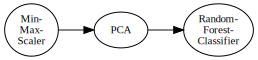

In [6]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()

In [7]:
pipeline_with_correction =  SMOTE(operator = MinMaxScaler() >> PCA() >> RandomForestClassifier())
optimizer = Hyperopt(estimator=pipeline_with_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:32<00:00,  3.21s/trial, best loss: -0.7334176194541631]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.719679,0.407182,0.664843,ok
p2,2,-0.623220,0.466136,0.666426,ok
p3,3,-0.728127,0.402570,0.569175,ok
p4,4,-0.697201,0.423362,0.660698,ok
p5,5,-0.725342,0.828936,0.580863,ok
p6,6,-0.733418,0.516059,0.639756,ok
p7,7,-0.713976,0.374947,0.632543,ok
p8,8,-0.627836,0.669042,1.744617,ok


0.6484848484848484


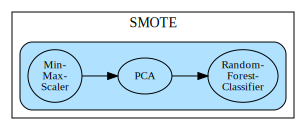

In [8]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()